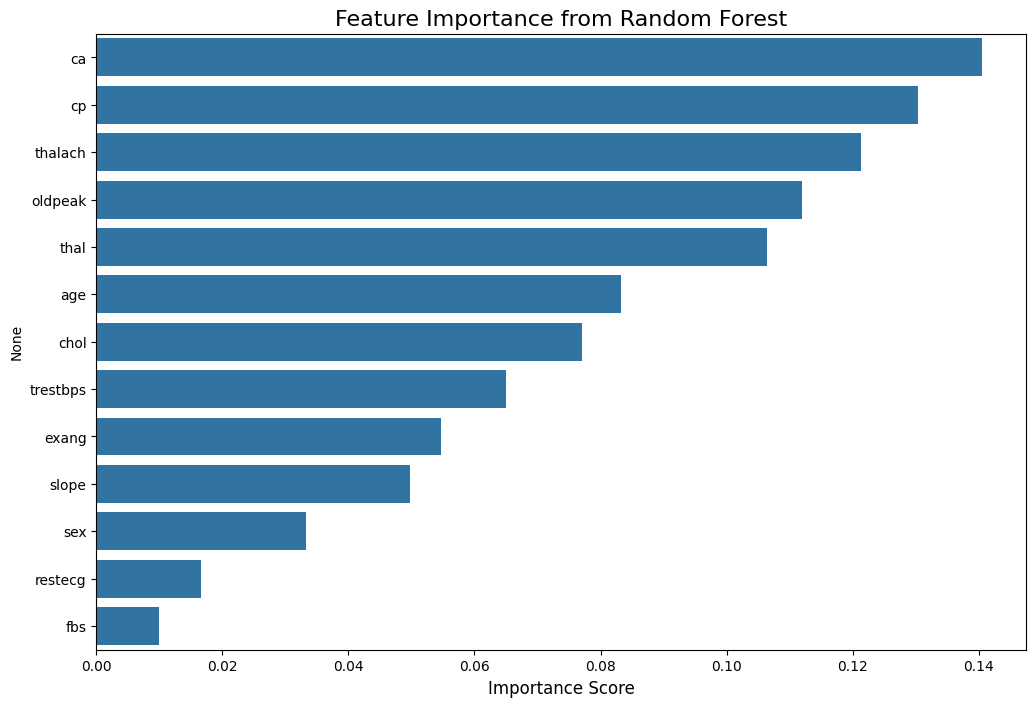

--- Top Features from Random Forest ---
ca          0.140525
cp          0.130438
thalach     0.121361
oldpeak     0.111902
thal        0.106356
age         0.083218
chol        0.077027
trestbps    0.064991
exang       0.054679
slope       0.049733
sex         0.033206
restecg     0.016682
fbs         0.009881
dtype: float64

--- Features selected by RFE ---
['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']

--- Features selected by Chi-Square Test ---
['age', 'cp', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']


In [1]:
# --- Cell 1: Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2, SelectKBest

# --- Cell 2: Load Data ---
df = pd.read_csv('../data/heart_disease_cleaned.csv')
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Cell 3: Feature Importance from Random Forest ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=importances.index)
plt.title('Feature Importance from Random Forest', size=16)
plt.xlabel('Importance Score', size=12)
plt.show()

print("--- Top Features from Random Forest ---")
print(importances)

# --- Cell 4: Recursive Feature Elimination (RFE) ---
# Select the top 8 features, for example
estimator = RandomForestClassifier(n_estimators=100, random_state=42)
selector = RFE(estimator, n_features_to_select=8, step=1)
selector = selector.fit(X_train, y_train)

# Get the selected features
selected_features_rfe = X.columns[selector.support_]
print("\n--- Features selected by RFE ---")
print(selected_features_rfe.tolist())

# --- Cell 5: Chi-Square Test (for categorical features) ---
# Chi-square works with non-negative features. For this dataset, they all are.
# We'll select the top 8 features based on their chi-square statistic.
chi_selector = SelectKBest(chi2, k=8)
X_kbest = chi_selector.fit_transform(X, y)

# Get selected feature names
selected_features_chi2 = X.columns[chi_selector.get_support()]
print("\n--- Features selected by Chi-Square Test ---")
print(selected_features_chi2.tolist())